In [5]:
import defSim as ds
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def plot_by_color(network, feature = 'f01', title = None, pos = None):
    nodes = network.nodes()

    colors = [network.nodes[n][feature] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    plt.figure(1,figsize=(7,7))
    if pos is None:
        pos = nx.spring_layout(network)
    ec = nx.draw_networkx_edges(network, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(network, pos, nodelist=nodes, node_color=colors, 
                                with_labels=False, node_size=100, cmap=plt.cm.winter,
                                vmin=0, vmax=1)
    
    if title is not None:
        plt.title(title)
    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

def plot_dynamics(feature, network = None):
    plt.figure(1,figsize=(10,8))
    if network is not None and 'color' in network.nodes[0]:
        colors = [network.nodes[n]['color'] for n in network.nodes]
        feature = np.array(feature).transpose()
        for i in range(len(feature)):
            plt.plot(feature[i], color = colors[i])
    else:
        plt.plot(feature)

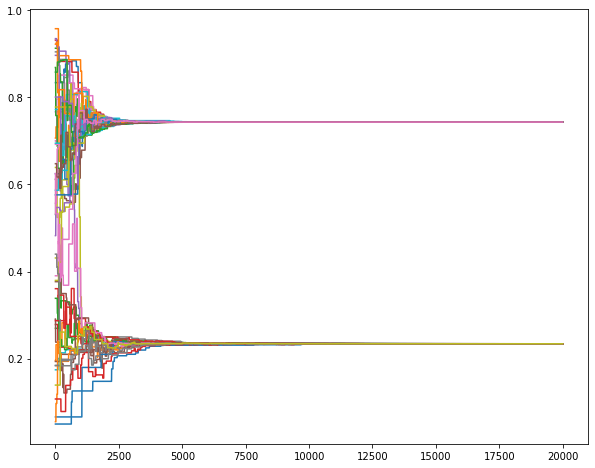

In [29]:
sim = ds.Simulation(
    influence_function = 'bounded_confidence', 
    attributes_initializer = 'random_continuous',
    dissimilarity_measure = 'euclidean',
    topology = 'grid',
    communication_regime = 'one-to-one',
    max_iterations = 20000,
    parameter_dict = {
        'num_agents': 49, 
        'neighborhood': 'moore',
        'confidence_level': 0.25
    },
    tickwise = ['f01']
)
plot_dynamics(feature = sim.run_simulation()['Tickwise_f01'][0])

In [30]:
my_experiment = ds.Experiment(seed=314,
                              influence_function="bounded_confidence",
                              attributes_initializer="random_continuous",
                              attribute_parameters={"num_features": 1},
                              dissimilarity_measure="euclidean",
                              topology="grid",
                              network_parameters={'num_agents': 49,
                                                  "neighborhood": "moore"},
                              influence_parameters={"confidence_level": .25},
                              communication_regime=['one-to-one', 'one-to-many'],
                              max_iterations=20000,
                              repetitions=20)

In [31]:
my_results = my_experiment.run(parallel=True)
my_results

40 different parameter combinations


,index,Seed,Ticks,SuccessfulInfluence,Topology,num_agents,neighborhood,num_features,communication_regime,confidence_level,seed,np_random_generator,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01
0,0,35746,20000,12646,grid,49,moore,1,one-to-one,0.25,35746,Generator(PCG64),46,1,0.040816,0.154479,0.450445
1,0,69807,20000,10218,grid,49,moore,1,one-to-one,0.25,69807,Generator(PCG64),49,1,0.020408,0.264974,0.429258
2,0,24610,20000,12246,grid,49,moore,1,one-to-one,0.25,24610,Generator(PCG64),49,1,0.020408,0.226221,0.428177
3,0,33034,20000,9899,grid,49,moore,1,one-to-one,0.25,33034,Generator(PCG64),49,1,0.020408,0.218217,0.445753
4,0,10345,20000,9853,grid,49,moore,1,one-to-one,0.25,10345,Generator(PCG64),49,1,0.020408,0.262255,0.533428
5,0,92635,20000,16541,grid,49,moore,1,one-to-one,0.25,92635,Generator(PCG64),8,1,0.530612,0.049652,0.438635
6,0,92331,20000,10480,grid,49,moore,1,one-to-one,0.25,92331,Generator(PCG64),49,1,0.020408,0.257387,0.531387
7,0,48288,20000,11361,grid,49,moore,1,one-to-one,0.25,48288,Generator(PCG64),49,1,0.020408,0.194175,0.483923
8,0,40701,20000,10087,grid,49,moore,1,one-to-one,0.25,40701,Generator(PCG64),48,1,0.040816,0.227799,0.502009
9,0,62598,20000,18836,grid,49,moore,1,one-to-one,0.25,62598,Generator(PCG64),2,1,0.979592,0.019911,0.488751


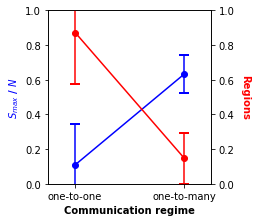

In [32]:
fig, ax1 = plt.subplots(figsize=[3,3])

plt.tight_layout()

x = ['one-to-one', 'one-to-many']
y = [sum(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Homogeneity']) / 20,
     sum(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Homogeneity']) / 20]
e = [np.std(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Homogeneity']),
     np.std(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Homogeneity'])]

ax1.errorbar(x, y, e,
             marker='o',
             color='b',
             capsize=5,
             capthick=2)
ax1.set_ylim(0, 1)
ax1.set_xlim(-0.25, 1.25)
plt.xlabel('Communication regime', fontweight='bold')
plt.ylabel(r'$S_{max}$ / $N$', fontweight='bold', color='blue')

ax2 = ax1.twinx()
x2 = ['one-to-one', 'one-to-many']
y2 = [sum(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Regions']) / 49 / 20,
     sum(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Regions']) / 49 / 20]
e2 = [np.std(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Regions']) / 49,
     np.std(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Regions']) / 49]
plt.errorbar(x2, y2, e2,
             marker='o',
             color='r',
             capsize=5,
             capthick=2)
ax2.set_ylim(0, 1)
plt.ylabel('Regions', fontweight='bold', color='red', rotation=-90, labelpad=16)

plt.show()

In [33]:
my_experiment2 = ds.Experiment(seed=314,
                              influence_function="similarity_adoption",
                              attributes_initializer="random_categorical",
                              attribute_parameters={"num_features": 1},
                              dissimilarity_measure="hamming",
                              topology="grid",
                              network_parameters={'num_agents': 49,
                                                  "neighborhood": "moore"},
                              influence_parameters={"homophily": 1},
                              communication_regime=['one-to-one', 'one-to-many'],
                              max_iterations=20000,
                              repetitions=20)

In [34]:
my_results2 = my_experiment2.run(parallel=True)
my_results2

40 different parameter combinations


,index,Seed,Ticks,SuccessfulInfluence,Topology,num_agents,neighborhood,num_features,communication_regime,homophily,seed,np_random_generator,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01
0,0,35746,20000,0,grid,49,moore,1,one-to-one,1,35746,Generator(PCG64),8,8,0.448980,0.678571,0.938776
1,0,69807,20000,0,grid,49,moore,1,one-to-one,1,69807,Generator(PCG64),4,4,0.367347,0.658163,1.081633
2,0,24610,20000,0,grid,49,moore,1,one-to-one,1,24610,Generator(PCG64),8,8,0.367347,0.693878,1.122449
3,0,33034,20000,0,grid,49,moore,1,one-to-one,1,33034,Generator(PCG64),7,7,0.387755,0.642857,0.836735
4,0,10345,20000,0,grid,49,moore,1,one-to-one,1,10345,Generator(PCG64),7,7,0.408163,0.627551,1.204082
5,0,92635,20000,0,grid,49,moore,1,one-to-one,1,92635,Generator(PCG64),8,8,0.306122,0.714286,1.061224
6,0,92331,20000,0,grid,49,moore,1,one-to-one,1,92331,Generator(PCG64),4,4,0.428571,0.632653,1.122449
7,0,48288,20000,0,grid,49,moore,1,one-to-one,1,48288,Generator(PCG64),9,9,0.346939,0.698980,1.020408
8,0,40701,20000,0,grid,49,moore,1,one-to-one,1,40701,Generator(PCG64),8,8,0.448980,0.673469,0.979592
9,0,62598,20000,0,grid,49,moore,1,one-to-one,1,62598,Generator(PCG64),11,11,0.469388,0.658163,0.816327


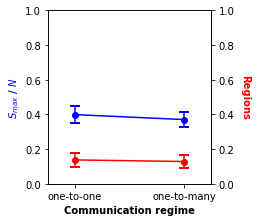

In [35]:
fig, ax1 = plt.subplots(figsize=[3,3])

plt.tight_layout()

x = ['one-to-one', 'one-to-many']
y = [sum(my_results2.loc[my_results2['communication_regime'] == 'one-to-one', 'Homogeneity']) / 20,
     sum(my_results2.loc[my_results2['communication_regime'] == 'one-to-many', 'Homogeneity']) / 20]
e = [np.std(my_results2.loc[my_results2['communication_regime'] == 'one-to-one', 'Homogeneity']),
     np.std(my_results2.loc[my_results2['communication_regime'] == 'one-to-many', 'Homogeneity'])]

ax1.errorbar(x, y, e,
             marker='o',
             color='b',
             capsize=5,
             capthick=2)
ax1.set_ylim(0, 1)
ax1.set_xlim(-0.25, 1.25)
plt.xlabel('Communication regime', fontweight='bold')
plt.ylabel(r'$S_{max}$ / $N$', fontweight='bold', color='blue')

ax2 = ax1.twinx()
x2 = ['one-to-one', 'one-to-many']
y2 = [sum(my_results2.loc[my_results2['communication_regime'] == 'one-to-one', 'Regions']) /49 / 20,
     sum(my_results2.loc[my_results2['communication_regime'] == 'one-to-many', 'Regions']) /49 / 20]
e2 = [np.std(my_results2.loc[my_results2['communication_regime'] == 'one-to-one', 'Regions']) / 49,
     np.std(my_results2.loc[my_results2['communication_regime'] == 'one-to-many', 'Regions']) / 49]
plt.errorbar(x2, y2, e2,
             marker='o',
             color='r',
             capsize=5,
             capthick=2)
ax2.set_ylim(0, 1)
plt.ylabel('Regions', fontweight='bold', color='red', rotation=-90, labelpad=16)

plt.show()